# Статистика кансельнутих маршрутів

In [31]:
import pandas as pd

df = pd.read_excel("../Loads 2024.xlsx", sheet_name="DATA")

df["RPM"] = pd.to_numeric(df["RPM"], errors="coerce")
df["Miles"] = pd.to_numeric(df["Miles"], errors="coerce")
df["Rate"] = pd.to_numeric(df["Rate"], errors="coerce")
df["Broker"] = df["Broker"].astype(str).str.strip()
df["Status"] = df["Status"].astype(str).str.strip().str.upper()

# Фільтрація скасованих рейсів
 Створено новий DataFrame лише з тими записами, де статус "CANCELED".

In [32]:
df_canceled = df[df["Status"] == "CANCELED"].copy()

In [33]:
print("Усього скасованих рейсів:", len(df_canceled))

Усього скасованих рейсів: 44


In [34]:
df_canceled["Broker"].value_counts()

Broker
TQL                 3
AXLE LOG            3
BNSF                2
TRANSFIX            2
EASE LOG            2
MAGELLAN            2
NOLAN TRANS         2
ATG                 1
TRAFFIX             1
SCOTLYNN            1
R2 LOG              1
RXO                 1
SIMPLE LOG          1
J.B.HUNT            1
UBER FREIGHT        1
CBT                 1
FREEWAY             1
RYAN                1
RPM                 1
AVENUE LOG          1
TRANSPLACE          1
FEDEX               1
LOGISTIC GROUP      1
BAY AND BAY         1
ADAM JAMES LOG      1
ECHO                1
ALLEN LUND          1
CHRW                1
TRINITY             1
AMERICAN LOG        1
ALBERTSON           1
REDWOOD             1
EXPEDITUS           1
TRANSPORTATION 1    1
SPOT                1
Name: count, dtype: int64

In [35]:
df_canceled.loc[:, "Route"] = df_canceled["From City"].str.upper() + " → " + df_canceled["To City"].str.upper()
df_canceled["Route"].value_counts().head(10)

Route
FREMONT → ADRIAN                 2
FRESNO → VAN BUREN TWP           2
PLEASANT PRAIRIE → NEW ALBANY    1
LODI → SOLON                     1
CASHMERE → MARION                1
MODESTO → BUFFALO GROVE          1
GUNTERSVILLE → MORTON            1
MANTECA → BROWNSTOWN TOWNSHIP    1
ANDERSON → SCHAUMBURG            1
BETHLEHEM → NEW LENOX            1
Name: count, dtype: int64

# Статистика для відстані скасованих рейсів (`Miles`)
| Показник | Пояснення |
|----------|-----------|
| `count`  | Кількість рейсів з вказаною відстанню (не NaN) |
| `mean`   | Середнє значення відстані (в милях) |
| `std`    | Стандартне відхилення — показує, наскільки дані варіативні |
| `min`    | Мінімальна відстань |
| `max`    | Максимальна відстань |

In [36]:
df_canceled.loc[:, "Miles"] = pd.to_numeric(df_canceled["Miles"], errors="coerce")
df_canceled["Miles"].describe()[["count", "mean", "std", "min", "max"]].to_frame().T

,count,mean,std,min,max
Miles,43.0,1708.72093,802.914344,119.0,2428.0


 💰 Оцінка втрат через скасування

In [37]:
df_canceled["Rate"] = pd.to_numeric(df_canceled["Rate"], errors="coerce")
total_lost = df_canceled["Rate"].sum()
print(f" Орієнтовна втрата прибутку через скасування: ${total_lost:,.2f}")

 Орієнтовна втрата прибутку через скасування: $124,692.80


# Графік скасувань по тижнях

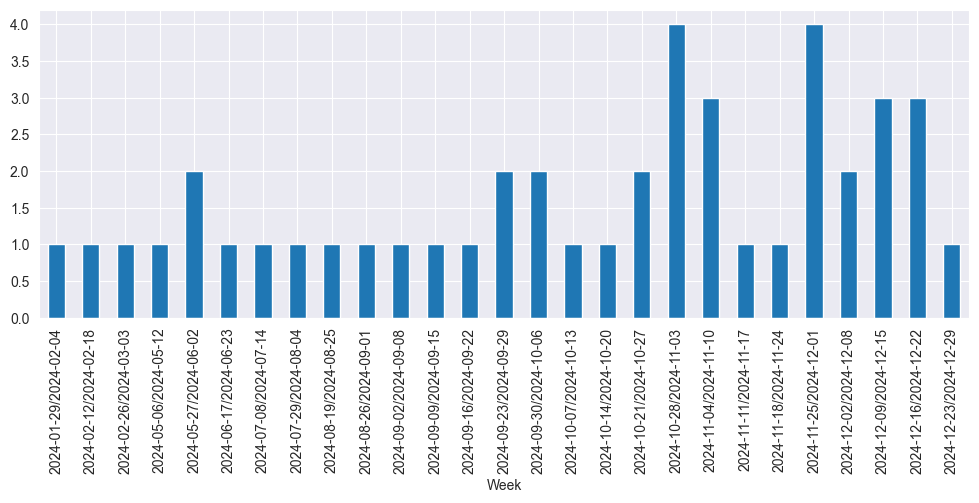

In [38]:
df_canceled["start"] = pd.to_datetime(df_canceled["start"], errors="coerce")
df_canceled["Week"] = df_canceled["start"].dt.to_period("W")

df_canceled.groupby("Week").size().plot(kind="bar", figsize=(12, 4));

# Аналіз скасувань по типах вантажів

In [39]:
df_canceled["Type of load"].value_counts().head(10)

Type of load
DRY    35
TC      9
Name: count, dtype: int64